Our (hypothetical) marketing department needs some help in focussing on the most important market segment. Instead of marketing to everyone, they need our help in identifying who our most profitable customers are. Are they married or unmarried, working or retired, premium or budget buyers etc… This will help them position things better.

Also, they need help in identifying the bestselling products.

So, given the transaction data, help us identify the top 3 most profitable products and characteristics of our most loyal customers.  Also include your hypothesis of why you think the loyal customers like"""

#Importing libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import requests

##Loading the data from the drive
First we're going to create the folder and csv files to store the data which we're going to download from the drive link.

In [2]:
data_dir = Path("./data")
purchase_data = data_dir/"purchase_behaviour.csv"
transaction_data = data_dir/"transaction_data.csv"

if data_dir.is_dir():
  print(f"{data_dir} Folder already exist!!!!!")
else:
  print(f"Creating the folder {data_dir}...........")
  Path.mkdir(data_dir)
  print(f"Created The folder {data_dir}!!!!!")

Creating the folder data...........
Created The folder data!!!!!


Now we're going build a function which will read the content of the drive link and the write the content to desire file location.

In [3]:
def load_data(file_id:str, file: Path)->pd.DataFrame:

  """
  This function is used to load in the data from the give gogle drive file_id and saves the into the target file and returns the dataframe.
  **args:
      file_id: This takes in the url from where the data should be loaded from.
      file: This takes in the folder path where the data should be saved.
  """
  with open(file,"wb") as f1:
    response = requests.get(f"https://drive.google.com/uc?export=download&id={file_id}")
    f1.write(response.content)
  return pd.read_csv(file)


In [4]:
purchase_df = load_data("1Ha7uOqWOJcFUbZVT6C_JS40QlIneLbbd",purchase_data)
transaction_df = load_data("1w6QsVhoMO6VO8Kt_5SeZfIm1WHhqF7QW",transaction_data)
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


##Exploring the data


In [6]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [8]:
purchase_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [9]:
transaction_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DATE,264836.0,43464.036260,105.389282,43282.0,43373.0,43464.0,43555.00,43646.0
STORE_NBR,264836.0,135.080110,76.784180,1.0,70.0,130.0,203.00,272.0
LYLTY_CARD_NBR,264836.0,135549.476404,80579.978022,1000.0,70021.0,130357.5,203094.25,2373711.0
TXN_ID,264836.0,135158.310815,78133.026026,1.0,67601.5,135137.5,202701.25,2415841.0
PROD_NBR,264836.0,56.583157,32.826638,1.0,28.0,56.0,85.00,114.0
PROD_QTY,264836.0,1.907309,0.643654,1.0,2.0,2.0,2.00,200.0
TOT_SALES,264836.0,7.304200,3.083226,1.5,5.4,7.4,9.20,650.0


In [10]:
purchase_df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [11]:
transaction_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

##Top 3 best selling product
We're going to use the group by method to group the best selling product on the from the product sales with the Total sales.

In [12]:
top_products = transaction_df.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index()

In [13]:
top_products = top_products.sort_values(by="TOT_SALES")

In [53]:
top_products.tail()

,PROD_NAME,TOT_SALES
76,Smiths Crinkle Original 330g,34302.6
33,Kettle Mozzarella Basil & Pesto 175g,34457.4
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
11,Dorito Corn Chp Supreme 380g,40352.0


##Creating datafram of loyal customers
We're going to group the loyal custmers using the groupby fucntion to group the transactin id with the card number.

In [15]:
purchase_df["PREMIUM_CUSTOMER"].value_counts(), purchase_df["LIFESTAGE"].value_counts()

(PREMIUM_CUSTOMER
 Mainstream    29245
 Budget        24470
 Premium       18922
 Name: count, dtype: int64,
 LIFESTAGE
 RETIREES                  14805
 OLDER SINGLES/COUPLES     14609
 YOUNG SINGLES/COUPLES     14441
 OLDER FAMILIES             9780
 YOUNG FAMILIES             9178
 MIDAGE SINGLES/COUPLES     7275
 NEW FAMILIES               2549
 Name: count, dtype: int64)

In [16]:
loyal_customers = transaction_df.groupby("LYLTY_CARD_NBR")["TXN_ID"].count().reset_index().sort_values(by="TXN_ID",ascending=False)

In [17]:
loyal_customers.head()

,LYLTY_CARD_NBR,TXN_ID
42813,162039,18
45905,172032,18
3686,13138,17
31654,116181,17
34943,128178,17


##Creating the customer segmentation dataframe
We're going to now use the knowledge of the loyal customer and purchases data to get the details about our loyal customers.

In [18]:
customer_segments = loyal_customers.merge(purchase_df, on="LYLTY_CARD_NBR", how="left")
customer_segments.head()

,LYLTY_CARD_NBR,TXN_ID,LIFESTAGE,PREMIUM_CUSTOMER
0,162039,18,OLDER FAMILIES,Mainstream
1,172032,18,YOUNG SINGLES/COUPLES,Mainstream
2,13138,17,YOUNG FAMILIES,Mainstream
3,116181,17,YOUNG FAMILIES,Premium
4,128178,17,OLDER FAMILIES,Mainstream


In [19]:
customer_segments.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TXN_ID"].sum().reset_index()

,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID
0,MIDAGE SINGLES/COUPLES,Budget,5020
1,MIDAGE SINGLES/COUPLES,Mainstream,11874
2,MIDAGE SINGLES/COUPLES,Premium,8216
3,NEW FAMILIES,Budget,3005
4,NEW FAMILIES,Mainstream,2325
5,NEW FAMILIES,Premium,1589
6,OLDER FAMILIES,Budget,23160
7,OLDER FAMILIES,Mainstream,14244
8,OLDER FAMILIES,Premium,11192
9,OLDER SINGLES/COUPLES,Budget,18407


In [56]:
customer_product_analysis = transaction_df.merge(purchase_df, on="LYLTY_CARD_NBR", how="left")
segment_product_sales = customer_product_analysis.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER", "PROD_NAME"])["TOT_SALES"].sum().reset_index()
top_products_by_segment = segment_product_sales.sort_values(by="TOT_SALES", ascending=False).groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
top_products_by_segment.head(10)

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME,TOT_SALES
2177,YOUNG SINGLES/COUPLES,Mainstream,Dorito Corn Chp Supreme 380g,3659.5
2252,YOUNG SINGLES/COUPLES,Mainstream,Smiths Crnkle Chip Orgnl Big Bag 380g,3516.4
2199,YOUNG SINGLES/COUPLES,Mainstream,Kettle Mozzarella Basil & Pesto 175g,3380.4
2243,YOUNG SINGLES/COUPLES,Mainstream,Smiths Crinkle Chips Salt & Vinegar 330g,3317.4
761,OLDER FAMILIES,Budget,Smiths Crinkle Chips Salt & Vinegar 330g,3186.3
...,...,...,...,...
576,NEW FAMILIES,Premium,Cheezels Cheese 330g,222.3
647,NEW FAMILIES,Premium,Smiths Crinkle Chips Salt & Vinegar 330g,222.3
609,NEW FAMILIES,Premium,Kettle Sweet Chilli And Sour Cream 175g,221.4
592,NEW FAMILIES,Premium,Grain Waves Sweet Chilli 210g,212.4


##Creating function to plot graph and showcase results

In [55]:
def plot_graph(data:pd.DataFrame):
  """This function is used to make barplot to know the relationship between the totla sales by product_name/lifestage/primum_cistomer.
  **args:
        data: This parameters takes in the pandas DataFrame object through which the data will be taken from for plotting.
  """

  # Set up the figure and subplots
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns

  # --- Plot 1: Sales vs Product Name ---
  sns.barplot(x="TOT_SALES", y="PROD_NAME", data=data[:20], palette="viridis", ax=axes[0])
  axes[0].set_title("Top 10 Best-Selling Products")
  axes[0].set_xlabel("Total Sales")
  axes[0].set_ylabel("Product Name")

  # --- Plot 2: Sales by Premium vs. Budget Customers ---
  sns.barplot(x="PREMIUM_CUSTOMER", y="TOT_SALES", data=data, palette="coolwarm", ax=axes[1])
  axes[1].set_title("Total Sales by Customer Type")
  axes[1].set_xlabel("Customer Type")
  axes[1].set_ylabel("Total Sales")

  # --- Plot 3: Sales by Lifestage ---
  sns.barplot(x="TOT_SALES", y="LIFESTAGE", data=data, palette="magma", ax=axes[2])
  axes[2].set_title("Total Sales by Lifestage")
  axes[2].set_xlabel("Total Sales")
  axes[2].set_ylabel("Lifestage")

  # Adjust layout for better spacing
  plt.tight_layout()
  plt.show()

<ipython-input-49-c893df6ba02a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TOT_SALES", y="PROD_NAME", data=data[:20], palette="viridis", ax=axes[0])
<ipython-input-49-c893df6ba02a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PREMIUM_CUSTOMER", y="TOT_SALES", data=data, palette="coolwarm", ax=axes[1])
<ipython-input-49-c893df6ba02a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TOT_SALES", y="LIFESTAGE", data=data, palette="magma", ax=axes[2])


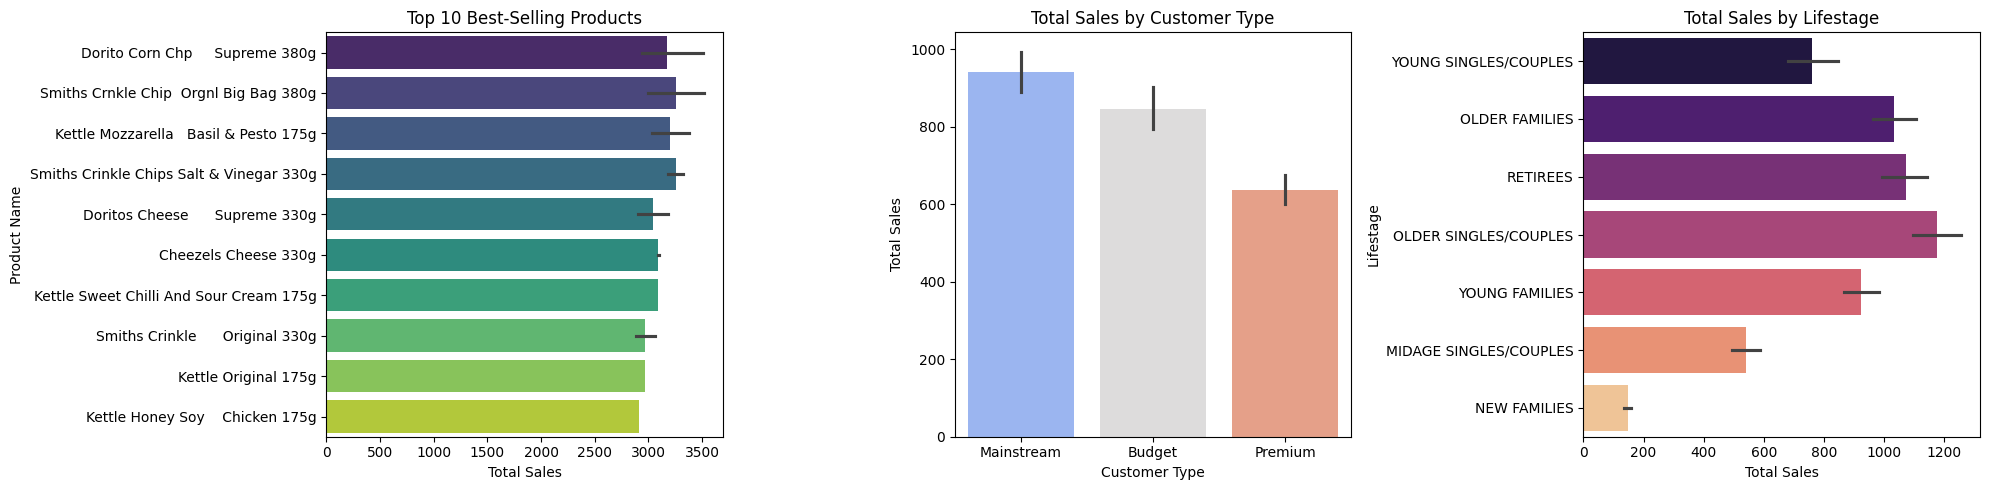

In [50]:
plot_graph(data=top_products_by_segment.head(2394))

#Hypothesis
##Why do loyal customers buy what they buy?

###1. Young Singles/Couples (Mainstream)

- Prefer Dorito Corn Chips Supreme 380g, Cheezels Cheese 330g, and Smiths Crinkle Chips Salt & Vinegar 330g.

- Hypothesis:
  - Likely prefer larger packs because they host gatherings, game nights, or casual snacking.

  - Mainstream customers may be looking for popular and well-known brands.

###2. Older Families (Budget)

- Buy Smiths Crinkle Chips Salt & Vinegar 330g and Dorito Corn Chips Supreme 380g.

- Hypothesis:
  - Larger families purchase bulk-sized packs for sharing.

  - Budget-conscious families may go for cheaper, high-value items.

###3. Retirees (Mainstream)

- Consistent buyers across multiple products.

- Hypothesis:
  - They have more stable shopping habits and prefer consistent quality over trends.

  - Likely purchase for personal consumption or family visits.
